In [108]:
secret = 'Sba121' #reading from database

In [109]:
import psycopg2 as pg2

In [110]:
conn = pg2.connect(dbname="testme", user="postgres", password=secret, sslmode="disable")

In [111]:
cur = conn.cursor()

In [112]:
cur.execute('SELECT * FROM boston_housing')

In [113]:
import pandas as pd #for working with dataframe
import numpy as np #for linear algebra

In [114]:
import matplotlib.pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [115]:
from pandas import DataFrame

In [116]:
df = DataFrame(cur.fetchall()) #making dataframe what we fetched

In [117]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [170]:
col_names = [] #getting column names
for col in cur.description:
    col_names.append(col[0])

In [171]:
col_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [172]:
df.rename(columns={0:'crim', 1:'zn', 2:'indus', 3:'chas', 4:'nox', 5:'rm', 6:'age', 7:'dis', 8:'rad', 9:'tax',
                  10:'ptratio', 11:'b', 12:'lstat', 13:'medv'}, inplace=True) #replacing original column names with the 
                                                                              #numbers

In [121]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     486 non-null    float64
 1   zn       486 non-null    float64
 2   indus    486 non-null    float64
 3   chas     486 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      486 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    486 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560262,88.9762
zn,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
indus,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
chas,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
age,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


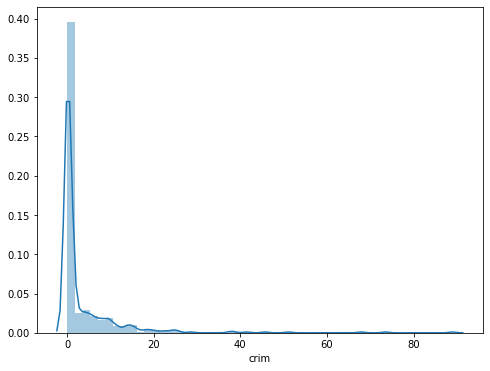

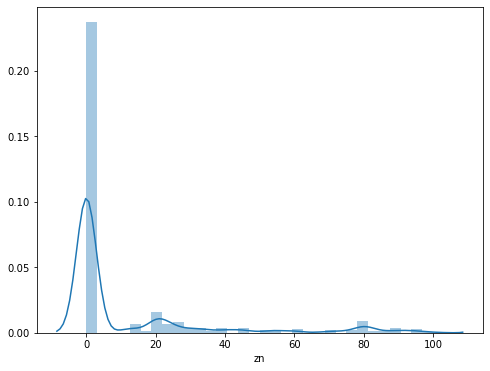

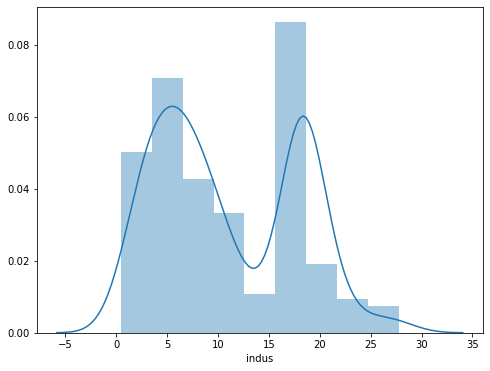

C:\Users\berker_ayaz\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


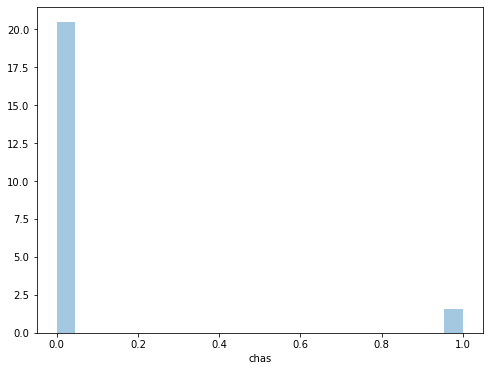

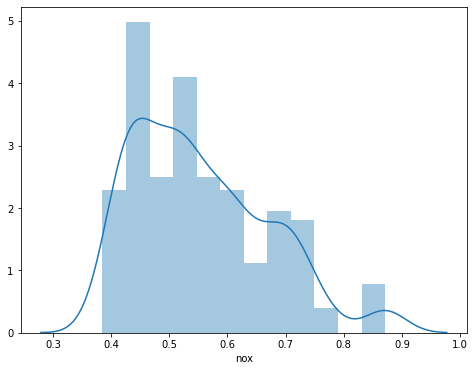

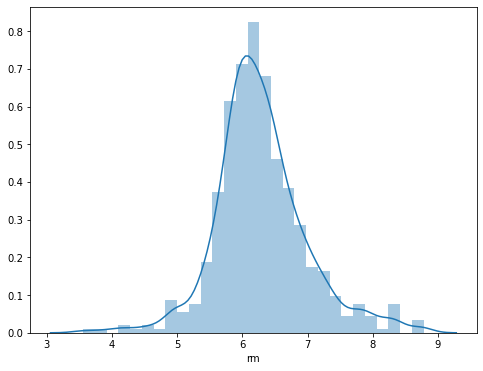

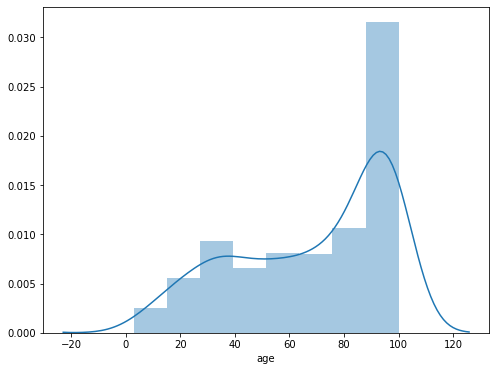

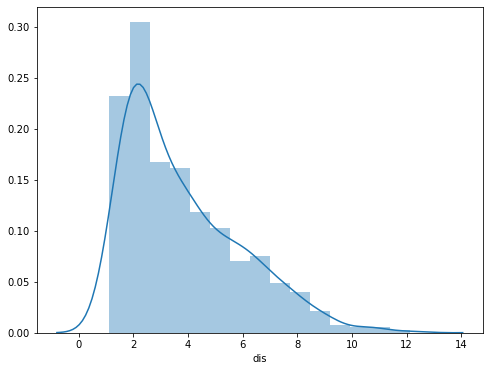

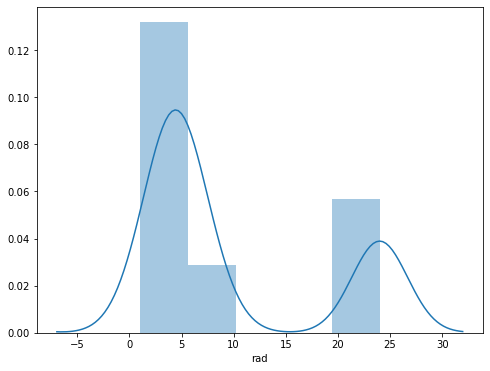

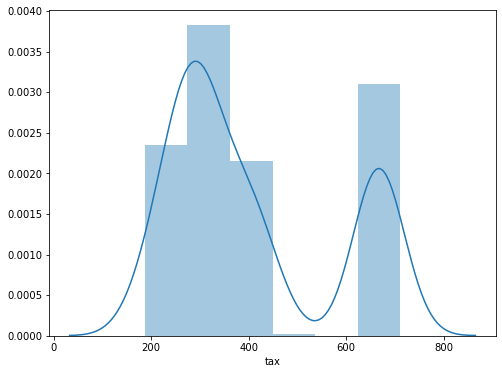

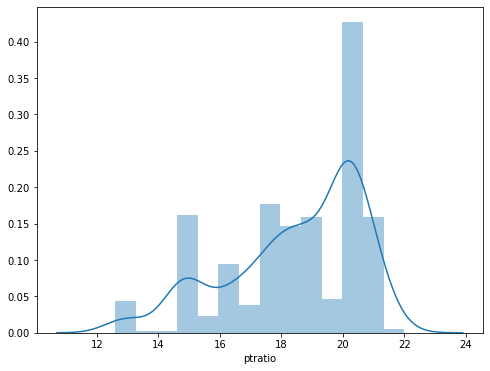

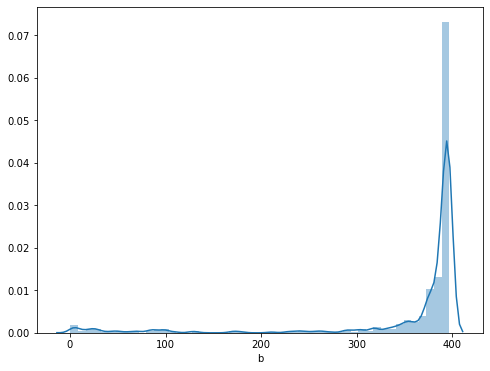

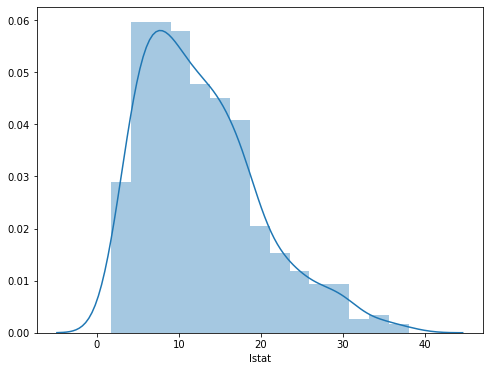

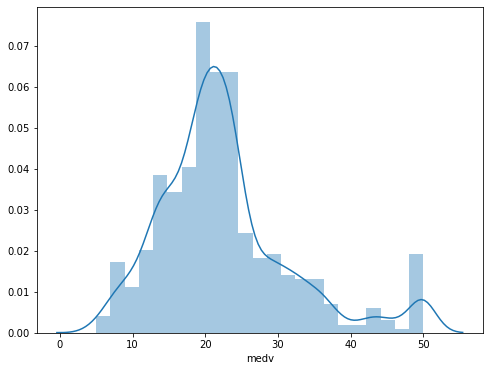

In [124]:
for i in df.columns: #first impression on variables 
    plt.figure(figsize=(8,6))
    sns.distplot(df[i].dropna())
    plt.show()

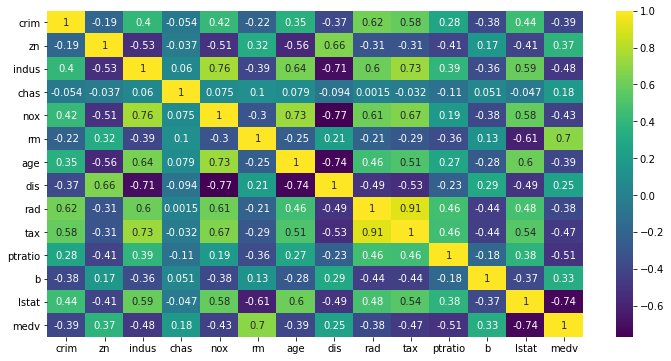

In [125]:
plt.figure(figsize=(12,6)) #correlation between variables
sns.heatmap(data=df.corr(), cmap='viridis', annot=True )

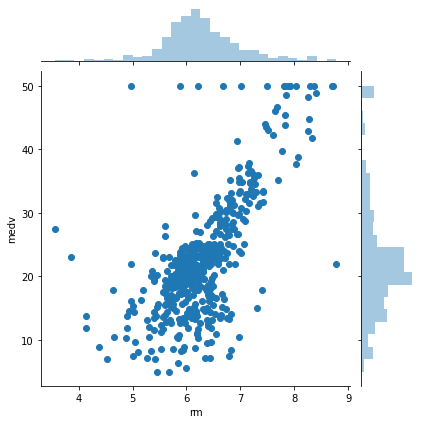

In [126]:
sns.jointplot(x='rm', y='medv', data=df, kind='scatter') #visualizing the higher correlation values between x-y

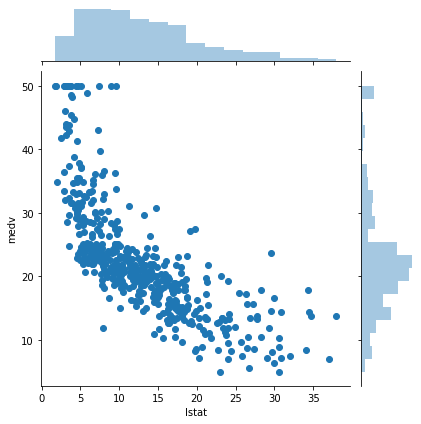

In [127]:
sns.jointplot(x='lstat', y='medv', data=df, kind='scatter') #visualizing the higher correlation values between x-y

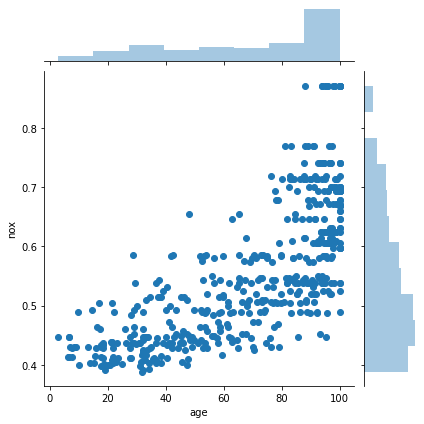

In [128]:
sns.jointplot(x='age', y='nox', data=df, kind='scatter') #visualizing the higher correlation values between variables

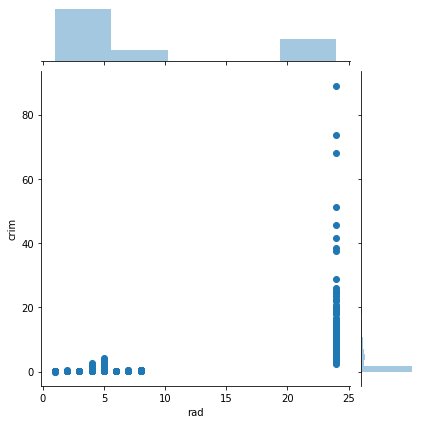

In [129]:
sns.jointplot(x='rad', y='crim', data=df, kind='scatter') #visualizing the higher correlation values between variables

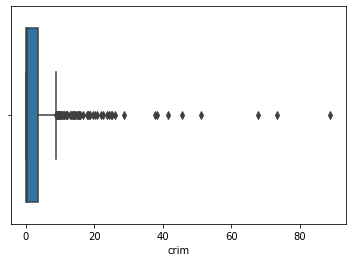

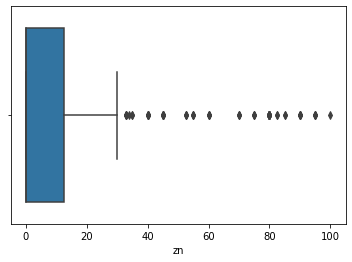

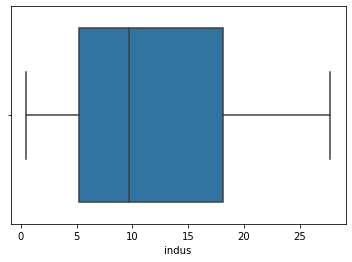

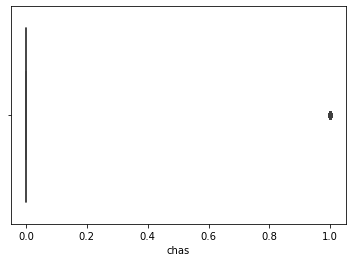

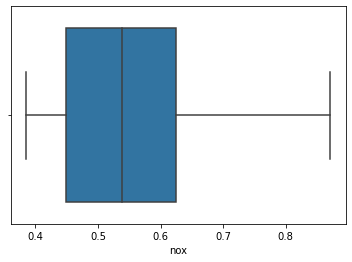

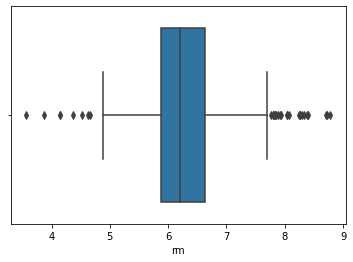

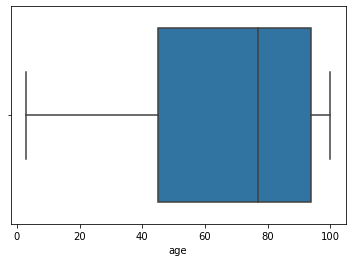

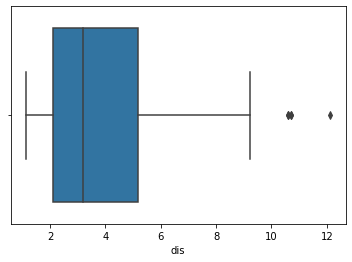

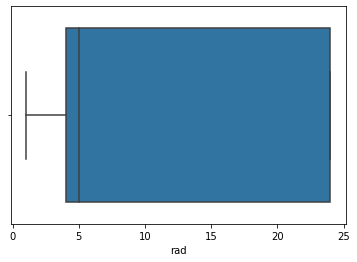

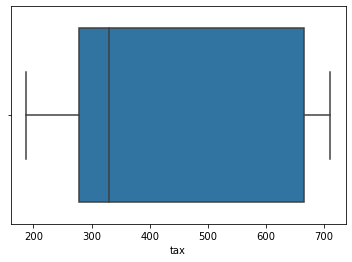

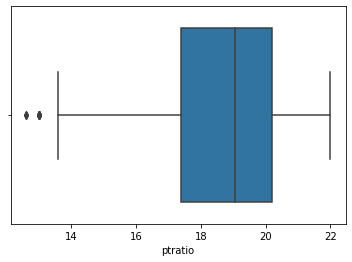

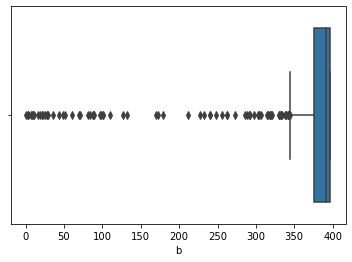

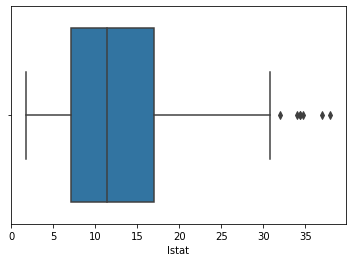

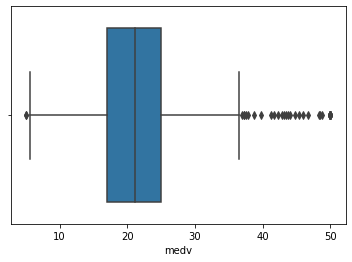

In [130]:
for i in df.columns: #boxplots for taking a glance at distribution of variables again
    sns.boxplot(df[i].dropna())
    plt.show()

In [131]:
df = df.drop(df.index[df['dis'] > 10], axis=0) #getting rid of outliers

In [132]:
df = df.drop(df.index[df['ptratio'] < 13], axis=0) #getting rid of outliers

In [133]:
df = df.drop(df.index[df['lstat'] > 32], axis=0) #getting rid of outliers

In [134]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [135]:
df['crim'] = df['crim'].fillna(value=df['crim'].median()) #handling the missing values

In [136]:
df['zn'] = df['zn'].fillna(value=df['zn'].median()) #handling the missing values

In [137]:
df['rm'] = df['rm'].fillna(value=df['rm'].median()) #handling the missing values

In [138]:
df['age'] = df['age'].fillna(value=df['age'].mean()) #handling the missing values

In [139]:
df['indus'] = df['indus'].fillna(value=df['indus'].mean()) #handling the missing values

In [140]:
df['chas'].mode()

0    0.0
dtype: float64

In [141]:
df['chas'] = df['chas'].fillna(value=0) #handling the missing values

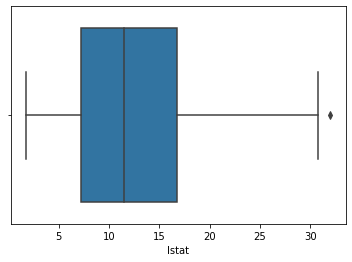

In [142]:
sns.boxplot(x=df['lstat'], data=df)

In [143]:
df['lstat'] = df.drop(df.index[df['lstat'] > 31]) #getting rid of outliers

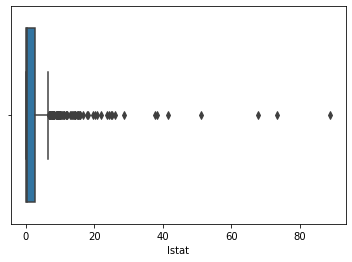

In [144]:
sns.boxplot(x=df['lstat'], data=df)

In [145]:
df['lstat'] = df['lstat'].fillna(value=df['lstat'].median()) #handling the missing values

In [146]:
df.isna().any() #is there anyone else?!

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

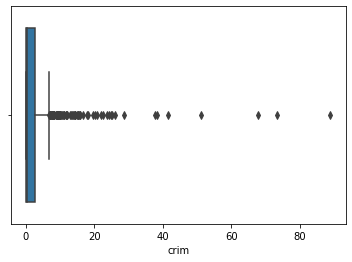

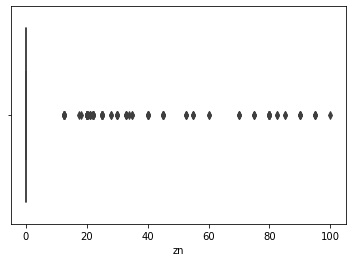

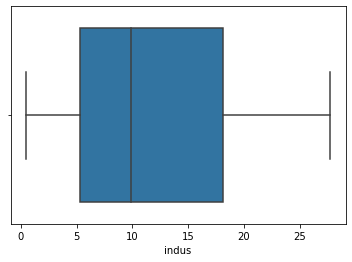

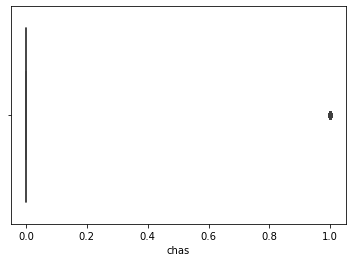

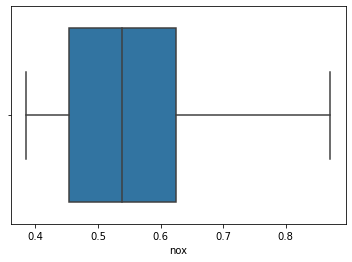

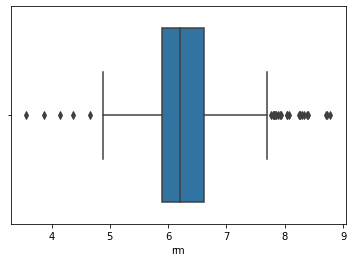

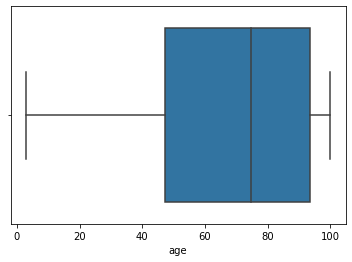

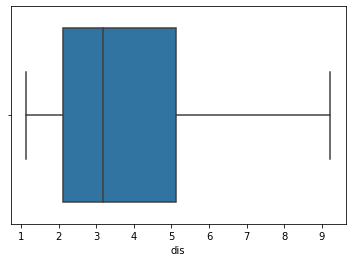

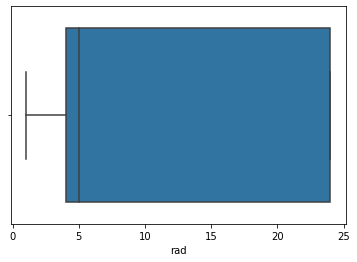

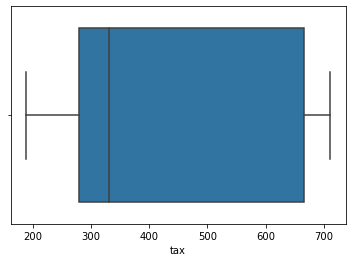

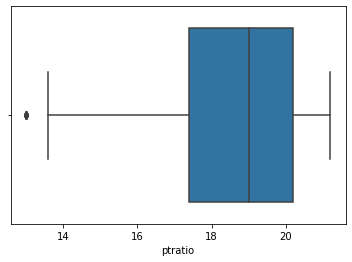

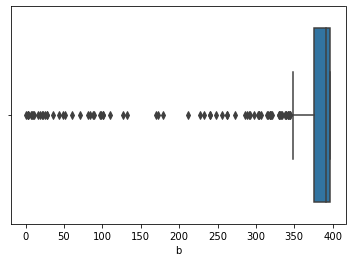

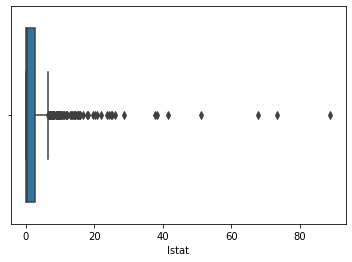

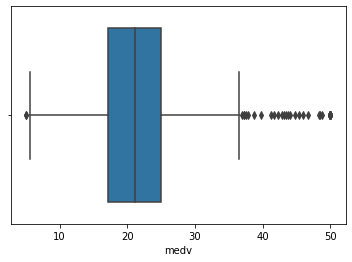

In [147]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [148]:
X = df.drop('medv', axis=1) #x and y values
y = df['medv']

In [149]:
from sklearn.model_selection import train_test_split 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [151]:
from sklearn.preprocessing import RobustScaler #since we have too much outliers on variables

In [152]:
scaler = RobustScaler()

In [153]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
from sklearn.linear_model import LinearRegression 

In [155]:
lm = LinearRegression()

In [156]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
pred = lm.predict(X_test)

In [158]:
pred

array([35.58771816, 15.80196996, 19.65003162, 38.24223562, 18.53432873,
       29.11912226, 15.12487736, 37.33316861, 20.71532212, 27.03923957,
       14.68626315, 25.21113009, 24.30020804, 22.15454847, 20.83334202,
       30.64446898, 12.98952818, 24.08978383, 14.7524009 , 34.03670332,
       19.72772333, 23.7970296 , 19.79655984, 12.8022943 , 17.40525031,
       23.9901167 , 17.01143054, 34.24111276, 35.50976211, 38.59869929,
       10.39842455, 27.74206313, 16.27672212, 30.60949489, 25.22986061,
       17.22652385, 32.76914449, 31.33586315, 30.9812902 , 30.43689515,
       21.83465991, 34.9920513 , 10.36317295, 17.53052576, 24.48725676,
       32.54830225, 22.03261929, 28.9617441 , 18.68518603, 19.80556517,
       19.78937169, 24.26947412, 32.92235289, 21.76819071, 18.95641347,
       21.90072102, 18.86947176, 30.65578517, 16.96208513, 31.93974614,
       32.02924405, 36.5918853 , 29.38219771, 20.57697661, 22.00000343,
       14.90742613, 21.30915623, 15.94969384, 37.17124313, 19.10

In [159]:
print(lm.intercept_)

22.40911246128998


In [160]:
lm.coef_

array([-0.83969579,  0.03741083, -0.8257092 ,  1.25050626, -3.1131981 ,
        3.8389008 , -2.52336686, -4.91077034,  5.93990099, -4.7497146 ,
       -2.94308778,  0.31695972,  0.37418111])

Text(0, 0.5, 'Predicted Values')

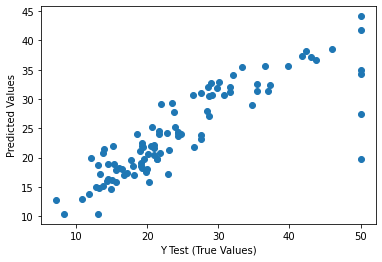

In [163]:
plt.scatter(y_test,pred) #not bad except for a couple of values
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

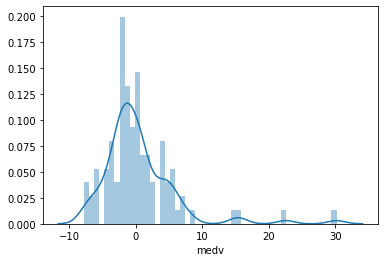

In [165]:
sns.distplot((y_test-pred),bins=50) #seems normally distributed but we have outliers

In [166]:
from sklearn import metrics

In [167]:
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('\n')
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('\n')
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  3.5572311945361537


MSE:  31.26237237610468


RMSE:  5.591276453199634


In [168]:
from sklearn.metrics import r2_score

In [169]:
metrics.explained_variance_score(y_test, pred) #not bad for a real life example

0.7183020679206166